In [1]:
#importing all required modules 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2#opencv library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
#importing fashion mnist library 
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
#Scaling pixel values to between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

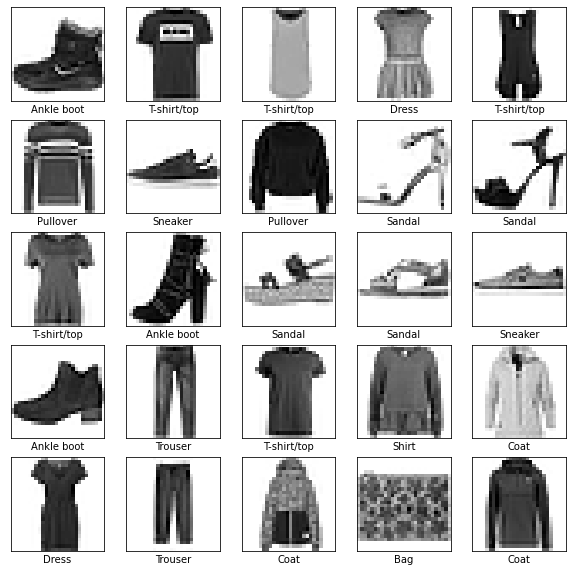

In [4]:
#sample images of all of the classes from the fashion_mnist training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
#setting up the model layers 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#transforms the images into a one-dimensional array
    keras.layers.Dense(128, activation='relu'),#neural layer using the relu function
    keras.layers.Dense(10)#returns logits array with length of 10 (one for each of the 10 classes)
])

In [6]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
#training the model
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2323 - accuracy: 0.9112
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2248 - accuracy: 0.9160
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2190 - accuracy: 0.9187
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2130 - accuracy: 0.9191
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2050 - accuracy: 0.9229
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2001 - accuracy: 0.9248
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1940 - accuracy: 0.9262
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1909 - accuracy: 0.9285
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1862 - accuracy: 0.9303
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.179

In [21]:
#evaluating accuracy and loss on the test dataset 
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3662 - accuracy: 0.8895

Test accuracy: 0.8895000219345093


In [22]:
#using model to make predicitions on a test image (#0)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) #softmax converts logits to provabilities
predictions = probability_model.predict(test_images)
predictions[0]

array([2.5175832e-11, 1.0953876e-14, 2.3158086e-12, 7.7646486e-22,
       3.5414539e-11, 5.7882858e-07, 1.5271500e-13, 2.3460026e-04,
       2.0829578e-15, 9.9976486e-01], dtype=float32)

In [23]:
#what the model is most confident the image is 
np.argmax(predictions[0])


9

In [24]:
#setting up the prediction graphs
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue' #blue for correct clasification
  else:
    color = 'red'#red for incorrect classification 

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

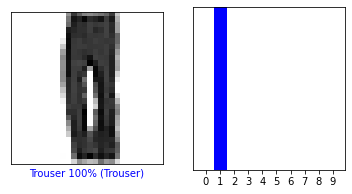

In [25]:
#testing predictons on test data
i = 47
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

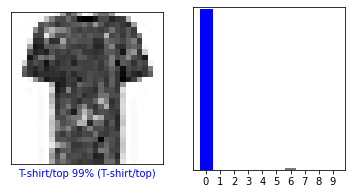

In [26]:
#testing the model on a random test image 
import random
i = random.randint(0,10000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

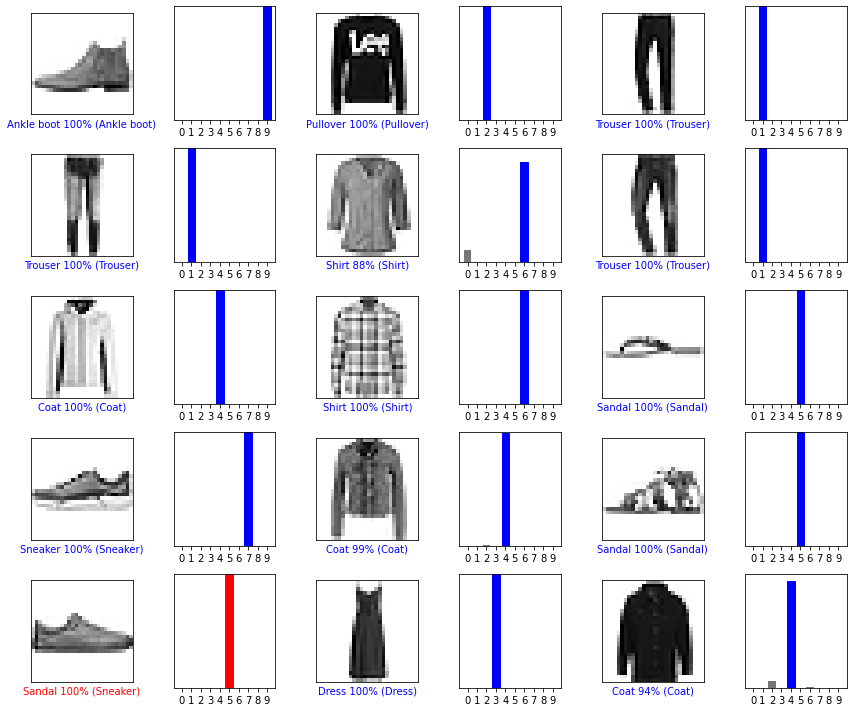

In [27]:
# Plot the 15 test images with predicted and true labels
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

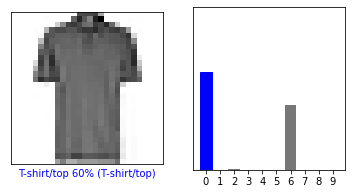

In [28]:
#testing a random iamge from the dataset
i = random.randint(0,10000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

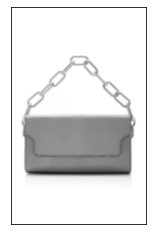

Original Dimensions :  (2560, 1598)
Resized Dimensions :  (28, 28)


In [29]:
#testing image of a bag from google 

#read the image
img=cv2.imread('C:/Users/amoorhead21/bag.jpg',0)
#display this image
plt.imshow(img,cmap='gray',interpolation='BICUBIC') #displays in the RGB format
plt.xticks([]), plt.yticks([]) #hide the tick values on both axes
plt.show()

img = img/255 #Scaling pixel values to between 0 and 1


#resizing image to 28*28
print('Original Dimensions : ',img.shape)
 
width = 28
height = 28
dim = (width, height)
 
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 




In [30]:
# Add the image to a batch where it's the only member.
print(resized.shape)
resized = (np.expand_dims(resized,0))
print(resized.shape)


(28, 28)
(1, 28, 28)


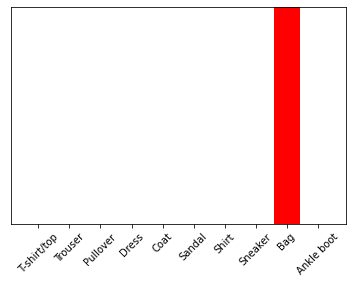

In [31]:
#predict the image 
predictions_single = probability_model.predict(resized)
#plot the image 
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


'C:\\WINDOWS\\system32'